# Data preprocessing

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from gensim.models import word2vec

In [3]:
current_directory = os.getcwd()
print(current_directory)

c:\Users\seowoo kim\Desktop\노나없


In [5]:
# Japan first_read japan data
data_j = pd.read_csv("./review_data_american_only_sentences.csv")
data_j.head()

,SeparatedSentences
0,Wasn't what I expected.
1,Really enjoyed it.
2,Including the hope for redemption at the end.
3,A true feel good movie that I wish I saw in th...
4,Anne Hathaway and Robert DeNiro have great che...


# Preprocessing Strategy

1. Expand contractions : pycontractions
2. lowercase
3. change numbers to words : inflect
4. Remove Punctuations : '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'
5. Remove remained emoji, japanese, chinese, korean words
6. PoS_tagging: from nltk import pos_tag
7. If needed, remove PRP, TO, DT, etc. 
8. Stemming: PorterStemmer
9. Find out average sentence length
10. Wordcloud


In [6]:
# Pycontractions doesn't work due to dependency issue. I just modulized it by myself.

from contractions import expand_contractions

contracted_list = []
Sentences = data_j['SeparatedSentences'].copy()

for sentence in Sentences:
    expanded_sentence = expand_contractions(sentence)
    contracted_list.append(expanded_sentence)


In [7]:
contracted_list[:5]

['was not what I expected.',
 'Really enjoyed it.',
 'Including the hope for redemption at the end.',
 'A true feel good movie that I wish I saw in theaters.',
 'Anne Hathaway and Robert DeNiro have great chemistry and the movie tells a great story of 2 people generations apart growing closer and learning from each other.']

In [8]:
# Transform all sentences into lower case! easy!

contracted_list = [text.lower() for text in contracted_list]

In [9]:
contracted_list[:5]

['was not what i expected.',
 'really enjoyed it.',
 'including the hope for redemption at the end.',
 'a true feel good movie that i wish i saw in theaters.',
 'anne hathaway and robert deniro have great chemistry and the movie tells a great story of 2 people generations apart growing closer and learning from each other.']

In [10]:
# Change numbers into words
import inflect
p = inflect.engine()

def convert_number(text):
    def replace_number(match):
        number = match.group()
        return p.number_to_words(number)
    
    converted_text = re.sub(r'\d+', replace_number, text)
    return converted_text

inflected_list = []
inflected_list = [convert_number(text) for text in contracted_list]         

In [11]:
# Remove punctuations
rm_punctionations = inflected_list.copy()

def rm_punct(text):
    cleaned_text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', ' ', text)
    return cleaned_text

rm_punctionations = [rm_punct(text) for text in rm_punctionations]

In [12]:
rm_punctionations

['was not what i expected ',
 'really enjoyed it ',
 'including the hope for redemption at the end ',
 'a true feel good movie that i wish i saw in theaters ',
 'anne hathaway and robert deniro have great chemistry and the movie tells a great story of two people generations apart growing closer and learning from each other ',
 'there is strong character development and a solid cast all around ',
 'i recommend it to anyone ',
 'all the pieces seem to be there except a truly appropriate third act ',
 'the intern  has chemistry rich lead performances and a tenured auteur behind the camera ',
 'brilliant movie ',
 'so warm  so satisfying and so moved ',
 'recommend',
 'these two bonified great actors somehow have a great chemistry that truly makes this movie worth watching ',
 'it rushes the story along but that does not take away from the heartwarming affect it was going for ',
 'the movie was very good ',
 'i cannot believe what other critics are rating and saying about this movie ',
 't

In [13]:
# remove japanese, korean, chinese words

def only_english(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    return cleaned_text

rm_punctionations = [only_english(text) for text in rm_punctionations]

In [14]:
# POS_tagging

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# 필요한 NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Text를 단어 토큰과 POS 태그로 변환
def pos_tagging(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

tag_sentence = rm_punctionations.copy()

tag_sentence = [pos_tagging(text) for text in tag_sentence]


[nltk_data] Downloading package punkt to C:\Users\seowoo
[nltk_data]     kim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seowoo kim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
tag_sentence

[[('was', 'VBD'),
  ('not', 'RB'),
  ('what', 'WP'),
  ('i', 'NN'),
  ('expected', 'VBD')],
 [('really', 'RB'), ('enjoyed', 'VBN'), ('it', 'PRP')],
 [('including', 'VBG'),
  ('the', 'DT'),
  ('hope', 'NN'),
  ('for', 'IN'),
  ('redemption', 'NN'),
  ('at', 'IN'),
  ('the', 'DT'),
  ('end', 'NN')],
 [('a', 'DT'),
  ('true', 'JJ'),
  ('feel', 'NN'),
  ('good', 'JJ'),
  ('movie', 'NN'),
  ('that', 'IN'),
  ('i', 'JJ'),
  ('wish', 'VBP'),
  ('i', 'NN'),
  ('saw', 'NN'),
  ('in', 'IN'),
  ('theaters', 'NNS')],
 [('anne', 'JJ'),
  ('hathaway', 'NN'),
  ('and', 'CC'),
  ('robert', 'NN'),
  ('deniro', 'NN'),
  ('have', 'VBP'),
  ('great', 'JJ'),
  ('chemistry', 'NN'),
  ('and', 'CC'),
  ('the', 'DT'),
  ('movie', 'NN'),
  ('tells', 'VBZ'),
  ('a', 'DT'),
  ('great', 'JJ'),
  ('story', 'NN'),
  ('of', 'IN'),
  ('two', 'CD'),
  ('people', 'NNS'),
  ('generations', 'NNS'),
  ('apart', 'RB'),
  ('growing', 'VBG'),
  ('closer', 'RBR'),
  ('and', 'CC'),
  ('learning', 'VBG'),
  ('from', 'IN'),
  ('e

In [17]:
nltk.download('tagsets')
nltk.help.upenn_tagset('WRB')

WRB: Wh-adverb
    how however whence whenever where whereby whereever wherein whereof why


[nltk_data] Downloading package tagsets to C:\Users\seowoo
[nltk_data]     kim\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Remove IN, PRP, CC, PRP$, DT, TO, FW, WP
def remove_specific_tags(tagged_sentence, tags_to_remove):
    return [word for word, tag in tagged_sentence if tag not in tags_to_remove]

tags_to_remove = {"IN", "PRP", "CC", "PRP$", "DT", "TO", "FW", "WP", "WRB"}

tag_rm = tag_sentence.copy()
tag_rm = [remove_specific_tags(text, tags_to_remove) for text in tag_rm]

In [17]:
tag_rm_sentence = [pos_tag(sentence) for sentence in tag_rm]
tag_rm_sentence[:5]

[[('was', 'VBD'), ('not', 'RB'), ('i', 'JJ'), ('expected', 'VBD')],
 [('really', 'RB'), ('enjoyed', 'VBN')],
 [('including', 'VBG'), ('hope', 'NN'), ('redemption', 'NN'), ('end', 'NN')],
 [('true', 'JJ'),
  ('feel', 'NN'),
  ('good', 'JJ'),
  ('movie', 'NN'),
  ('i', 'IN'),
  ('wish', 'JJ'),
  ('i', 'NN'),
  ('saw', 'VBD'),
  ('theaters', 'NNS')],
 [('anne', 'JJ'),
  ('hathaway', 'NN'),
  ('robert', 'NN'),
  ('deniro', 'NN'),
  ('have', 'VBP'),
  ('great', 'JJ'),
  ('chemistry', 'NN'),
  ('movie', 'NN'),
  ('tells', 'VBZ'),
  ('great', 'JJ'),
  ('story', 'NN'),
  ('two', 'CD'),
  ('people', 'NNS'),
  ('generations', 'NNS'),
  ('apart', 'RB'),
  ('growing', 'VBG'),
  ('closer', 'RBR'),
  ('learning', 'VBG'),
  ('other', 'JJ')]]

In [18]:
# Lemmatize & remove stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import wordnet as wn

nltk.download('wordnet')

# inflect engine initialize
p = inflect.engine()

# WordNetLemmatizer initialize
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return None

def singularize_and_lemmatize(tagged_words):
    new_words = []
    
    for word, tag in tagged_words:
        if tag.startswith('N'):
            singular_word = p.singular_noun(word)
            if singular_word:
                new_words.append(singular_word)
            else:
                new_words.append(word)
        else:
            wn_tag = get_wordnet_pos(tag)
            if wn_tag is not None:
                lemma_word = lemmatizer.lemmatize(word, wn_tag)
                new_words.append(lemma_word)
            else:
                new_words.append(word)
    
    return new_words

[nltk_data] Downloading package wordnet to C:\Users\seowoo
[nltk_data]     kim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
processed_sentences = [singularize_and_lemmatize(sentence) for sentence in tag_rm_sentence]

In [20]:
processed_sentences

[['be', 'not', 'i', 'expect'],
 ['really', 'enjoy'],
 ['include', 'hope', 'redemption', 'end'],
 ['true', 'feel', 'good', 'movie', 'i', 'wish', 'i', 'saw', 'theater'],
 ['anne',
  'hathaway',
  'robert',
  'deniro',
  'have',
  'great',
  'chemistry',
  'movie',
  'tell',
  'great',
  'story',
  'two',
  'person',
  'generation',
  'apart',
  'grow',
  'closer',
  'learn',
  'other'],
 ['there', 'be', 'strong', 'character', 'development', 'solid', 'cast'],
 ['i', 'recommend', 'anyone'],
 ['all',
  'piece',
  'seem',
  'be',
  'there',
  'truly',
  'appropriate',
  'third',
  'act'],
 ['intern',
  'have',
  'chemistry',
  'rich',
  'lead',
  'performance',
  'tenure',
  'auteur',
  'camera'],
 ['brilliant', 'movie'],
 ['so', 'warm', 'satisfying', 'so', 'move'],
 ['recommend'],
 ['two',
  'bonified',
  'great',
  'actor',
  'somehow',
  'have',
  'great',
  'chemistry',
  'that',
  'truly',
  'make',
  'movie',
  'worth',
  'watch'],
 ['rush',
  'story',
  'do',
  'not',
  'take',
  'awa

In [21]:
# stopwords
def remove_verbs(words):
    verbs_to_remove = {"am", "be", "are", "was", "were", "being", "is"}
    filtered_words = [word for word in words if word not in verbs_to_remove]
    return filtered_words

processed_sentences_no_stopwords = [remove_verbs(word) for word in processed_sentences]

In [22]:
processed_sentences_no_stopwords

[['not', 'i', 'expect'],
 ['really', 'enjoy'],
 ['include', 'hope', 'redemption', 'end'],
 ['true', 'feel', 'good', 'movie', 'i', 'wish', 'i', 'saw', 'theater'],
 ['anne',
  'hathaway',
  'robert',
  'deniro',
  'have',
  'great',
  'chemistry',
  'movie',
  'tell',
  'great',
  'story',
  'two',
  'person',
  'generation',
  'apart',
  'grow',
  'closer',
  'learn',
  'other'],
 ['there', 'strong', 'character', 'development', 'solid', 'cast'],
 ['i', 'recommend', 'anyone'],
 ['all', 'piece', 'seem', 'there', 'truly', 'appropriate', 'third', 'act'],
 ['intern',
  'have',
  'chemistry',
  'rich',
  'lead',
  'performance',
  'tenure',
  'auteur',
  'camera'],
 ['brilliant', 'movie'],
 ['so', 'warm', 'satisfying', 'so', 'move'],
 ['recommend'],
 ['two',
  'bonified',
  'great',
  'actor',
  'somehow',
  'have',
  'great',
  'chemistry',
  'that',
  'truly',
  'make',
  'movie',
  'worth',
  'watch'],
 ['rush',
  'story',
  'do',
  'not',
  'take',
  'away',
  'heartwarming',
  'affect',


In [23]:
# final..refine!

def replace_words(sentence):
    replacements = {
        r'\binternben\b': ['intern', 'ben'],
        r'\bexperiencesben\b': ['experience', 'ben'],
        r'\bbeingben\b': ['being', 'ben'],
        r'\bbentwo\b': ['ben', 'two'],
        r'\bbens\b': ['ben'],
        r'\bitben\b': ['it', 'ben'],
        r'\bheartben\b': ['heart', 'ben'],
        r'\botherben\b': ['other', 'ben'],
        r'\bbentheir\b': ['ben', 'their'],
        r'\bfamilyben\b': ['family', 'ben'],
        r'\bfunben\b': ['fun', 'ben'],
        r'\binternrobert\b': ['intern', 'robert'],
        r'\buprobert\b': ['up', 'robert'],
        r'\brealisticrobert\b': ['realistic', 'robert'],
        r'\btemperrobert\b': ['temper', 'robert'],
        r'\bplacerobert\b': ['place', 'robert'],
        r'\btimesrobert\b': ['time', 'robert'],
        r'\bniros\b': ['niro'],
        r'\bdeniro\b': ['niro'],
        r'\bniroi\b': ['niro', 'I'],
        r'\bmyershe\b': ['she'],
        r'\bmyersworking\b': ['working'],
        r'\banhathaway\b': ['hathaway'],
        r'\bsceneanhathaway\b': ['scene', 'hathaway'],
        r'\banhathawayhis\b': ['hathaway', 'his'],
        r'\bhathawayde\b': ['hathaway', 'de'],
        r'\bhathaways\b': ['hathaway'],
        r'\banhathaways\b': ['hathaway'],
        r'\brottenanhathaway\b': ['rotten', 'hathaway'],
        r'\btherejules\b': ['there', 'jule'],
        r'\bweakjule\b': ['weak', 'jule'],
        r'\bjules\b': ['jule'],
        r'\broutinejule\b': ['routine', 'jule'],
        r'\bagejule\b': ['age', 'jule'],
    }
    for pattern, replacement in replacements.items():
        sentence = re.sub(pattern, ' '.join(replacement), sentence)

    return sentence.split()

modified_sentences = [replace_words(' '.join(sentence)) for sentence in processed_sentences_no_stopwords]

In [24]:
modified_sentences

[['not', 'i', 'expect'],
 ['really', 'enjoy'],
 ['include', 'hope', 'redemption', 'end'],
 ['true', 'feel', 'good', 'movie', 'i', 'wish', 'i', 'saw', 'theater'],
 ['anne',
  'hathaway',
  'robert',
  'niro',
  'have',
  'great',
  'chemistry',
  'movie',
  'tell',
  'great',
  'story',
  'two',
  'person',
  'generation',
  'apart',
  'grow',
  'closer',
  'learn',
  'other'],
 ['there', 'strong', 'character', 'development', 'solid', 'cast'],
 ['i', 'recommend', 'anyone'],
 ['all', 'piece', 'seem', 'there', 'truly', 'appropriate', 'third', 'act'],
 ['intern',
  'have',
  'chemistry',
  'rich',
  'lead',
  'performance',
  'tenure',
  'auteur',
  'camera'],
 ['brilliant', 'movie'],
 ['so', 'warm', 'satisfying', 'so', 'move'],
 ['recommend'],
 ['two',
  'bonified',
  'great',
  'actor',
  'somehow',
  'have',
  'great',
  'chemistry',
  'that',
  'truly',
  'make',
  'movie',
  'worth',
  'watch'],
 ['rush',
  'story',
  'do',
  'not',
  'take',
  'away',
  'heartwarming',
  'affect',
  

In [25]:
# remove empty list
modified_sentences = [sentence for sentence in modified_sentences if sentence]

In [26]:
lengths = [len(sentence) for sentence in modified_sentences]

# sentence lenths discriptive analysis
median = np.median(lengths)
mean = np.mean(lengths)
percentile_75 = np.percentile(lengths, 75)
percentile_90 = np.percentile(lengths, 90)
percentile_95 = np.percentile(lengths, 95)

print ('median: ', median, 
       'mean: ', mean, 
       'per_75: ', percentile_75, 
       'per_90: ', percentile_90, 
       'per_95: ', percentile_95)

median:  8.0 mean:  9.701053976365378 per_75:  13.0 per_90:  19.0 per_95:  23.0


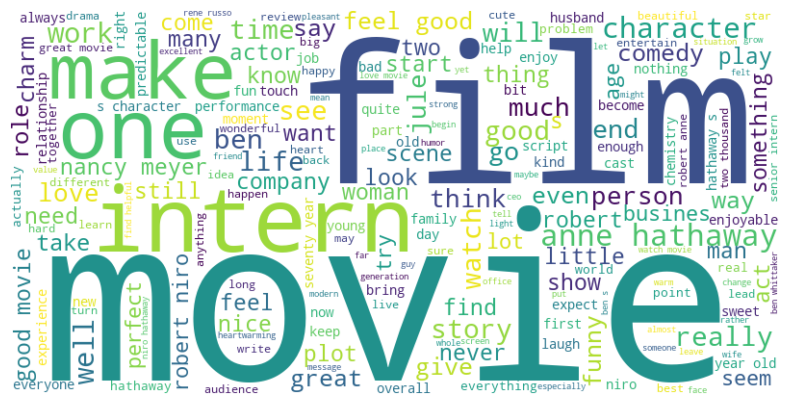

In [27]:
#wordcloud
from wordcloud import WordCloud
text_data_japan = " ".join([" ".join(sentence) for sentence in modified_sentences])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data_japan)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [28]:
from collections import Counter
all_words = [word for sentence in modified_sentences for word in sentence]
word_freq= Counter(all_words)
print(word_freq)

Counter({'movie': 3039, 'i': 2998, 'not': 2214, 'have': 2155, 'do': 1590, 'film': 1344, 'good': 1316, 'hathaway': 1174, 'intern': 1047, 's': 887, 'one': 880, 'great': 785, 'character': 782, 'make': 772, 'robert': 744, 'that': 737, 'very': 712, 'ben': 707, 'anne': 689, 'so': 686, 'see': 682, 'just': 680, 'watch': 655, 'old': 648, 'jule': 619, 'work': 615, 'well': 605, 'story': 604, 'niro': 599, 'really': 586, 'life': 586, 'feel': 585, 'get': 575, 'can': 569, 'would': 537, 'two': 532, 'more': 532, 'time': 526, 'there': 523, 'love': 489, 'person': 472, 'end': 468, 'go': 468, 'comedy': 465, 'will': 434, 'much': 399, 'up': 397, 'company': 396, 'too': 386, 'funny': 367, 'think': 366, 'give': 359, 'also': 353, 'play': 344, 'meyer': 336, 'woman': 335, 'way': 333, 'year': 333, 'say': 329, 'role': 319, 'want': 319, 'young': 317, 'find': 315, 'even': 314, 'which': 314, 'out': 313, 'other': 312, 'take': 304, 'could': 303, 'nice': 300, 'man': 291, 'actor': 287, 'thing': 287, 'nancy': 285, 'enjoy': 

In [29]:
df_word_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
df_word_freq.sort_values(by='Frequency', ascending=False, inplace=True)
df_word_freq

,Word,Frequency
12,movie,3039
1,i,2998
0,not,2214
20,have,2155
68,do,1590
...,...,...
5106,roster,1
5104,softball,1
5102,carefree,1
5096,boarding,1


In [30]:
#! pip install openpyxl
df_word_freq.to_excel('word_freq_america.xlsx')


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# word2Vec

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences=modified_sentences, vector_size=100, window=40, min_count=2, workers=1)

In [33]:
model.save("word2vec_america.model")

In [34]:
word_vectors = model.wv

In [35]:
similar_words = word_vectors.most_similar('intern')
print(similar_words)

[('internship', 0.9975408911705017), ('retirement', 0.9970167875289917), ('citizen', 0.995763897895813), ('internet', 0.9955655336380005), ('site', 0.9953050017356873), ('new', 0.9947983026504517), ('join', 0.9943445920944214), ('work', 0.994301438331604), ('enter', 0.9933261871337891), ('retiree', 0.9926694631576538)]


In [36]:
similar_words_100 = word_vectors.most_similar('age', topn=100)
print("Top 100 similar words:", similar_words_100)


Top 100 similar words: [('world', 0.9997503757476807), ('personal', 0.9992422461509705), ('wisdom', 0.998766303062439), ('teach', 0.9986974596977234), ('knowledge', 0.9985119104385376), ('purpose', 0.998412013053894), ('lady', 0.9983799457550049), ('technology', 0.9982903599739075), ('career', 0.9982333183288574), ('show', 0.9980446696281433), ('modern', 0.9980273842811584), ('start', 0.9979374408721924), ('employee', 0.9978148341178894), ('wise', 0.9977909326553345), ('house', 0.9977262020111084), ('york', 0.9976882338523865), ('family', 0.997682511806488), ('discover', 0.9975331425666809), ('school', 0.9974926114082336), ('youngster', 0.9974716305732727), ('daily', 0.9974034428596497), ('live', 0.9972478747367859), ('answer', 0.997139036655426), ('wife', 0.9971168637275696), ('college', 0.9970724582672119), ('challenge', 0.996908962726593), ('print', 0.9967761635780334), ('deal', 0.9967661499977112), ('brooklyn', 0.9966429471969604), ('mentor', 0.9966042637825012), ('millennial', 0.9